# Read results files

In [1]:
import os, json
from pprint import pprint

In [13]:
def read_table(fileobj, labels=None, col_types=None):
    """ Read a space-separated table from a file object.
    
        Args:
            TODO
        If `labels` is None assumes next(fileobj) will return a space-separated header starting '#'.
        Otherwise `labels` should be a sequence of column headers and next(fileobj) should return the first data line.
        Subsequent data lines are space-separated columns.
        If col_types is a sequence of callables these will be applied to column data (e.g. for type conversion).
    """
    
    table = {}
    if labels is None:
        # read header line next:
        header = next(fileobj)
        if not header.startswith('#'):
            raise ValueError('expected header row starting "#", got %s' % header)
        labels = header.split(None, len(col_types) if col_types is not None else -1)
    for label in labels:
        table[label] = []
    if col_types is None:
        noop = lambda v: v
        col_types = [noop for label in table.keys()]
    while True:
        try:
            line = next(fileobj)
            cols = line.split(None, len(labels))
            if cols == []:
                break
            else:
                for label, opr, value in zip(labels, col_types, cols):
                    table[label].append(opr(value))
        except StopIteration:
            break
    return table

def read_osu_out(path):
    with open(path) as f:
        for line in f:
            if line.startswith('# OSU MPI Bandwidth Test v5.6.2'):
                # ditch header line
                _ = next(f)
                data = read_table(f, ('Size', 'Bandwidth (MB/s)'), (int, float))
                return data

results = read_osu_out('sausage-hotdog/gnu8-openmpi3/runs/N2npn1/slurm-17.out')
pprint(results)

{'Bandwidth (MB/s)': [0.08,
                      0.14,
                      0.36,
                      0.64,
                      1.1,
                      2.41,
                      5.11,
                      9.24,
                      18.0,
                      36.3,
                      68.07,
                      89.76,
                      242.34,
                      345.77,
                      549.81,
                      716.51,
                      670.2,
                      804.83,
                      929.86,
                      994.15,
                      917.13,
                      880.87,
                      896.06],
 'Size': [1,
          2,
          4,
          8,
          16,
          32,
          64,
          128,
          256,
          512,
          1024,
          2048,
          4096,
          8192,
          16384,
          32768,
          65536,
          131072,
          262144,
          524288,
          1048576,
      

Text(0,0.5,'Bandwidth (MB/s)')

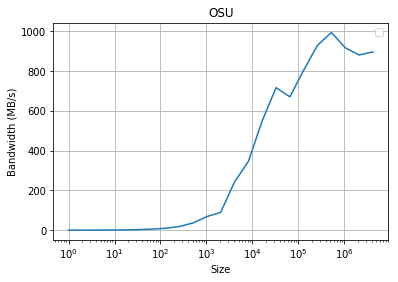

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(results['Size'], results['Bandwidth (MB/s)'])
plt.grid()
plt.title('OSU')
plt.legend()
plt.xscale('log')
plt.xlabel('Size')
plt.ylabel('Bandwidth (MB/s)')